In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255 

In [6]:
autoencoder = models.Sequential()
#인코더
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1),
                             activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2))
autoencoder.add(layers.Conv2D(18, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2))
autoencoder.add(layers.Conv2D(18, kernel_size=3, strides=2, padding='same', activation='relu'))

#디코더
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', activation='relu'))

In [7]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 18)        2610      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 18)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 18)          2934      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           1304      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [8]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 38s 81ms/step - loss: 0.2281 - val_loss: 0.2039
Epoch 2/50
469/469 [==============================] - 39s 82ms/step - loss: 0.1794 - val_loss: 0.1922
Epoch 3/50
469/469 [==============================] - 39s 83ms/step - loss: 0.1758 - val_loss: 0.2620
Epoch 4/50
469/469 [==============================] - 38s 82ms/step - loss: 0.1771 - val_loss: 0.2166
Epoch 5/50
469/469 [==============================] - 41s 88ms/step - loss: 0.1713 - val_loss: 0.2288
Epoch 6/50
469/469 [==============================] - 38s 80ms/step - loss: 0.1650 - val_loss: 0.1805
Epoch 7/50
469/469 [==============================] - 36s 77ms/step - loss: 0.1658 - val_loss: 0.1871
Epoch 8/50
469/469 [==============================] - 35s 75ms/step - loss: 0.1906 - val_loss: 0.1906
Epoch 9/50
469/469 [==============================] - 35s 75ms/step - loss: 0.1615 - val_loss: 0.1940
Epoch 10/50
469/469 [==============================] - 36s 76ms/step - loss: 0.152

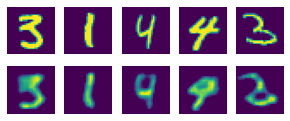

In [11]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)
plt.figure(figsize=(7, 2))
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i + 1) 
    plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
    ax.axis('off')


plt.show()